_11 In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set._

_(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables._

In [84]:
.libPaths("/Library/Frameworks/R.framework/Versions/3.4/Resources/library")
.libPaths() #Added R Studio's Package Path to Anaconda's Path
library(ISLR)
library(MASS)

[1] "/Library/Frameworks/R.framework/Versions/3.4/Resources/library"
[2] "/Users/Ajay/anaconda/lib/R/library"

In [3]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [4]:
mpg_med = median(Auto$mpg) #Find median
mpg01 = rep(1, length(Auto$mpg)) #Assign vector of 1s
mpg01[Auto$mpg < mpg_med] = 0 #Change to 0 if condition fails
new_Auto = data.frame(mpg01,Auto[-c(length(names(Auto)))]) #Create new dataframe, eliminating name
head(new_Auto)

mpg01,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18,8,307,130,3504,12.0,70,1
0,15,8,350,165,3693,11.5,70,1
0,18,8,318,150,3436,11.0,70,1
0,16,8,304,150,3433,12.0,70,1
0,17,8,302,140,3449,10.5,70,1
0,15,8,429,198,4341,10.0,70,1


_11 (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings._

Let us start with scatterplots of our new _mpg01_ with respect to the other columns.

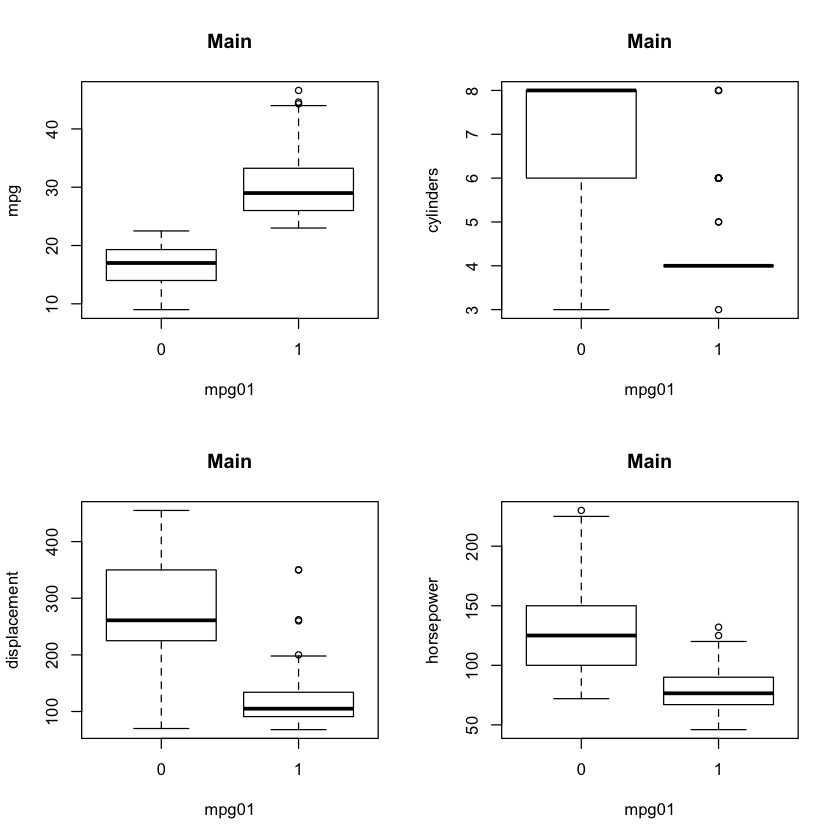

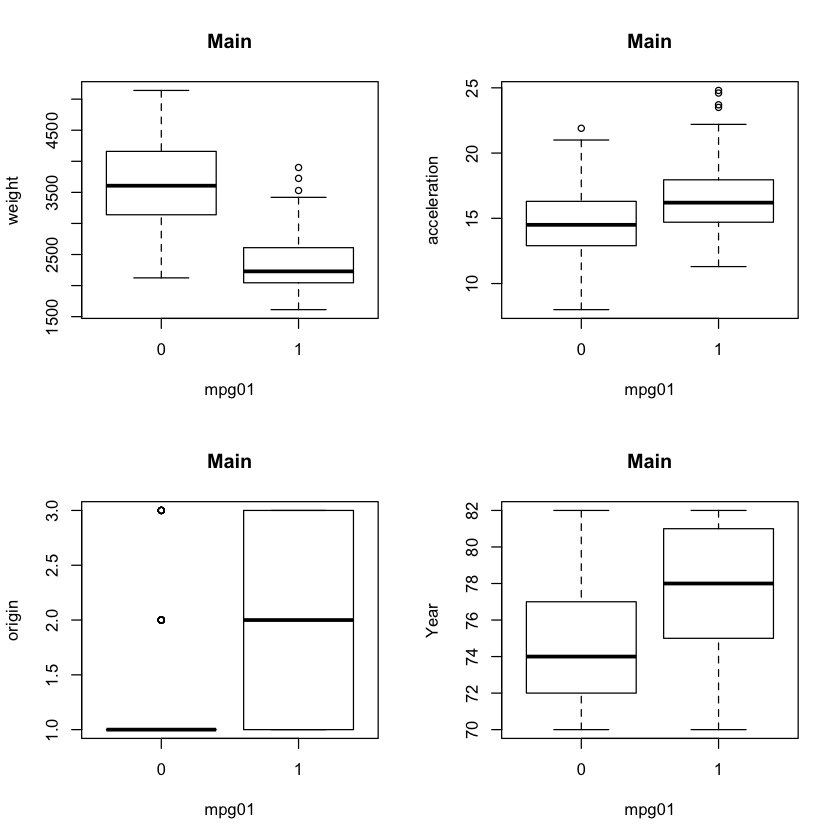

In [147]:
par(mfrow=c(2,2))
boxplot(mpg~mpg01, data=new_Auto, xlab="mpg01", ylab="mpg", main="Main")
boxplot(cylinders~mpg01, data=new_Auto, xlab="mpg01", ylab="cylinders", main="Main")
boxplot(displacement~mpg01, data=new_Auto, xlab="mpg01", ylab="displacement", main="Main")
boxplot(horsepower~mpg01, data=new_Auto, xlab="mpg01", ylab="horsepower", main="Main")
boxplot(weight~mpg01, data=new_Auto, xlab="mpg01", ylab="weight", main="Main")
boxplot(acceleration~mpg01, data=new_Auto, xlab="mpg01", ylab="acceleration", main="Main")
boxplot(origin~mpg01, data=new_Auto, xlab="mpg01", ylab="origin", main="Main")
boxplot(year~mpg01, data=new_Auto, xlab="mpg01", ylab="Year", main="Main")

- From the 1st plot of _mpg01_ vs _mpg_, we see a perfect separation between the categories 0 and 1. This makes sense as we created _mpg01_ using median miles per gallon as a threshold. 
- The next plot against number of cylinders also sees a clear distinction. Nearly all sample Automobiles with 4 cylinders have been classified _mpg01_ as 1. Let us verify this by determining the number of sample automobiles _mpg01_ = 1 but **not** having 4 cylinders. 

In [103]:
dim(new_Auto[new_Auto$cylinders !=4  & new_Auto$mpg01 == 1,])

[1] 17  9

There are only 17 such samples in this dataset.

- Engine Displacement is also well segregated by _mpg01_. Automobiles with Smaller Engine Displacement have _mpg01_=1. Once again, let us verify this by determining the number of Automobiles with Engine displacement >= 200.

In [115]:
dim(new_Auto[new_Auto$displacement >=200,]) #Num Automobiles with displacement >= 200
dim(new_Auto[new_Auto$displacement >=200 & new_Auto$mpg01 == 1,]) #Of these, how many have _mpg01=1?

[1] 165   9

[1] 5 9

Of the 165 automobiles that have Engine Displacements greater than 200, 5 of these have _mpg01_ = 1. The rest have _mpg01_=0.

- From the _horsepower_ and _mpg01_ boxplot, we observe a similar trend, although not as strong. Automobiles with horsepowers greater than 120 tend to have _mpg01_ = 0. I chose 120 because it is the approximate value of the upper fence.

In [116]:
dim(new_Auto[new_Auto$horsepower >=120,]) #Num Automobiles with horsepower >= 120
dim(new_Auto[new_Auto$horsepower >=120 & new_Auto$mpg01 == 1,]) #Of these, how many have mpg01=1?

[1] 106   9

[1] 3 9

Of the 106 cars with horsepower >= 120, only 3 of them have _mpg01_= 1.

- Heavier automobiles tend to have an _mpg01_= 0. 

In [120]:
dim(new_Auto[new_Auto$weight <=2500,]) #Num Automobiles with weight <= 2500 lbs.
dim(new_Auto[new_Auto$weight <=2500 & new_Auto$mpg01 == 0,]) #Of these, how many have mpg01=0?

[1] 144   9

[1] 11  9

Of the 144 Automobiles that weight less than 2500 pounds, only 11 of them have _mpg01_ = 0

- We don't observe such a well defined separation between the 2 classes of _mpg01_ with respect to acceleration.
- In _origin_, we observe that nearly all Automobiles with _mpg01_ = 0 are American made (1).

In [126]:
dim(new_Auto[new_Auto$mpg01 == 0,]) #Num Automobiles with mpg01 = 0
dim(new_Auto[new_Auto$mpg01 ==0 & new_Auto$origin == 1,]) #Of these, how many were made in America?

[1] 196   9

[1] 173   9

Of the 196 Automobiles with _mpg01_ = 0, 173 of them are American made. Now let us plot some scatterplots.

In [123]:
?Auto

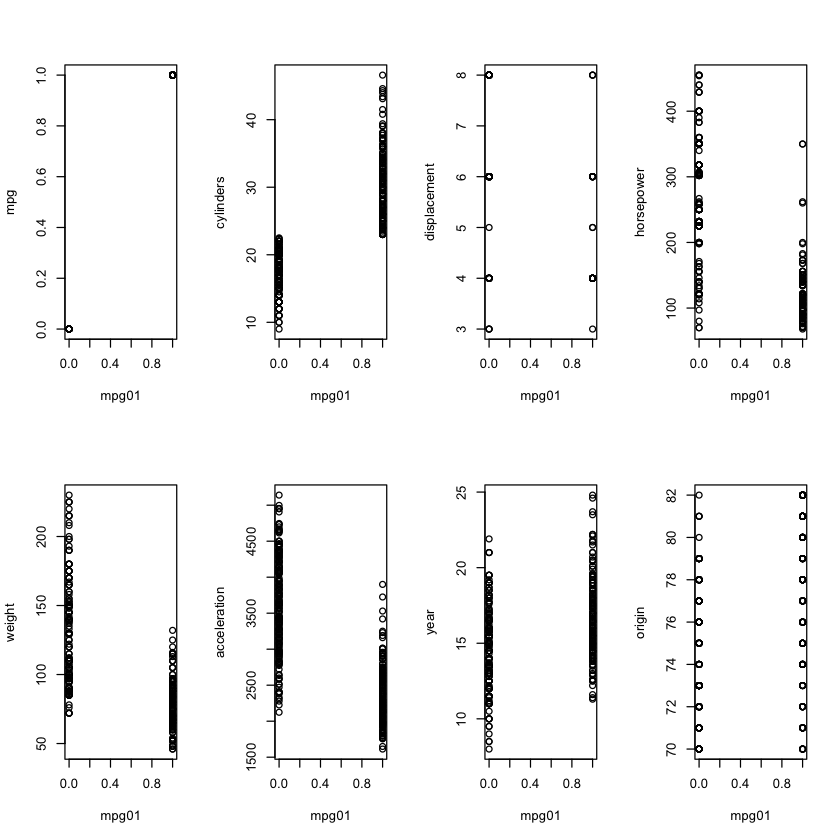

In [128]:
par(mfrow=c(2,4))
fields = names(new_Auto)[-1]
for (i in 1:length(fields)){
    plot(new_Auto$mpg0, new_Auto[,i], xlab="mpg01", ylab=fields[i])
}

Since _mpg01_ is a categorical field, it's effects are not so easily observed on a scatter plot. 

_11 (c) Split the data into a training set and a test set._

In [5]:
train = new_Auto[1:(0.7*nrow(new_Auto)), ] #Note Parenthesis around arithmatic operation. 
test = new_Auto[(0.7*nrow(new_Auto)+1): nrow(new_Auto), ]
dim(train)
dim(test)

[1] 274   9

[1] 117   9

We split the dataset in a 70:30 ratio.

_11 (d). Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?_

Let us consider how all variables except for _acceleration_, _year_, and _origin_. In other words, we will include the following fields:
- miles per gallon _mpg_
- number of _cyclinders_
- _displacement_
- _horsepower_
- _weight_ in pounds

In [9]:
cols = names(new_Auto) #[-c(1,7,8,9)]
train_part = train[,cols[-c(7,8,9)]]
test_part = test[,cols[-c(7,8,9)]]

cols = paste(cols[-c(1,7,8,9)], collapse="+")
model = lda(mpg01~mpg+cylinders+displacement+horsepower+weight, train_part)

#The following lines would work with glm. Not sure why LDA is acting up
#response = "mpg01"
#model = lda(paste(response,"~",cols), train_part)

predicitons = predict(model, test_part)
# See columns with names(predicitons)

#Switch 1 and 0 for notation
table(predicitons$class, test_part[,1])[2:1, 2:1]

   
     1  0
  1 94  2
  0  3 18

From the confusion matrix above, we have:
- 94 True Positives
- 18 True Negatives
- 2 False Positives 
- 3 False Negatives

$$
\textit{Simple Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{94+18}{94+18+2+3} = 0.5576 = \textbf{95.72%}
$$

This gives us a testing error rate of $100-95.72 = \textbf{4.28%}$. However, let us see the performance of LDA with just the 1 predictor _mpg_.

In [10]:
train_part = train[,1:2]
test_part = test[,1:2]

model = lda(mpg01~mpg, train_part)
predicitons = predict(model, test_part)

#Switch 1 and 0 for notation
table(predicitons$class, test_part[,1])[2:1, 2:1]

   
     1  0
  1 97  0
  0  0 20

Wow! With just one predictor miles per gallon _mpg_, we were able to predict _mpg01_ with a test error of $\textbf{0%}$. As I mentioned before, this is because _mpg01_ was created based on a threshold value median of _mpg_. Perfect Separation is expected.

_11 (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?_

In [11]:
cols = names(new_Auto)
train_part = train[,cols[-c(7,8,9)]]
test_part = test[,cols[-c(7,8,9)]]

cols = paste(cols[-c(1,7,8,9)], collapse="+")
model = qda(mpg01~mpg+cylinders+displacement+horsepower+weight, train_part)

predicitons = predict(model, test_part)

#Switch 1 and 0 for notation
table(predicitons$class, test_part[,1])[2:1, 2:1]

   
     1  0
  1 83  2
  0 14 18

From the confusion matrix above, we have:
- 83 True Positives
- 18 True Negatives
- 2 False Positives
- 14 False Negatives

QDA's test accuracy (for this particular set of features) isn't as good as that of LDA. 

$$
\textit{Simple Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{83+18}{83+18+2+14} = 0.8632 = \textbf{86.32%}
$$

This gives us a testing error rate of $100-86.32 = \textbf{13.68%}$. Let us see the performance of QDA with just the 1 predictor _mpg_.

In [12]:
train_part = train[,1:2]
test_part = test[,1:2]

model = qda(mpg01~mpg, train_part)
predicitons = predict(model, test_part)

#Switch 1 and 0 for notation
table(predicitons$class, test_part[,1])[2:1, 2:1]

   
     1  0
  1 97  0
  0  0 20

Like LDA, we get a test error of $\textbf{0%}$

_11 (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?_

In [33]:
cols = names(new_Auto)
train_part = train[,cols[-c(7,8,9)]]
test_part = test[,cols[-c(7,8,9)]]

model = glm(mpg01~cylinders+displacement+horsepower+weight, train_part, family=binomial)

predictions = predict(model, test_part, type="response")
preds = rep(0, length(test_part[,1]))

preds[predictions >= 0.5] = 1
table(preds, test_part[,1])[2:1, 2:1]

     
preds  1  0
    1 76  0
    0 21 20

From the confusion matrix above, we have:
- 76 True Positives
- 20 True Negatives
- 0 False Positives
- 21 False Negatives

Logistic Regression has the following simple Accuracy:
$$
\textit{Simple Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{76+20}{76+20+0+21} = 0.8205 = \textbf{82.05%}
$$

This gives us a test error rate of $100-82.05=\textbf{17.95%}$.

**NOTE**: I removed the _mpg_ covariate from the train set to prevent the **Hauck-Donner effect**, also known as perfect separation.

_11 (g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?_

We'll plot a graph of performance with different values of K.

## K=1 with _mpg_

In [7]:
library(class)

X_train = data.frame(mpg=train[,2])
X_test = data.frame(mpg=test[,2])
y_train = train[,1]
y_test = test[,1]

predictions = knn(X_train, X_test, y_train, k=1)
table(predictions, y_test)

           y_test
predictions  0  1
          0 20  0
          1  0 97

The problem of perfect separation in Logistic Regression is not a problem for KNN with K=1.

## K=1 without _mpg_ 

Will will replace miles per gallon with the following covariates:
- number of _cyclinders_
- _displacement_
- _horsepower_
- _weight_ in pounds

In [14]:
cols = names(new_Auto)
X_train = train[,cols[-c(1,2,7,8,9)]]
X_test = test[,cols[-c(1,2,7,8,9)]]
y_train = train[,1]
y_test = test[,1]

predictions = knn(X_train, X_test, y_train, k=1)
confusion=table(predictions, y_test)[2:1, 2:1]

           y_test
predictions  1  0
          1 73  2
          0 24 18

From the confusion matrix above, we have:
- 73 True Positives
- 18 True Negatives
- 2 False Positives 
- 24 False Negatives

$$
\textit{Simple Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{73+18}{73+18+2+24} = 0.7777 = \textbf{77.77%}
$$

This gives us a testing error rate of $100-77.77 = \textbf{22.23%}$. However, let us see the performance of LDA with just the 1 predictor _mpg_.

In [34]:
f_beta_measure = function(precision, recall, beta){
    return ( 1/((beta*(1/precision))+ ((1-beta)*(1/recall))))
}

get_accuracy_scores = function(conf){
    TP = conf[1,1]
    FP = conf[1,2]
    FN = conf[2,1]
    TN = conf[2,2]
    
    simple_accuracy = (TP+TN)/(TP+FP+TN+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f = f_beta_measure(precision, recall, beta=0.5)
    return (c(simple_accuracy, precision, recall, f))
}

confusion=table(predictions, y_test)[2:1, 2:1]
get_accuracy_scores(confusion)

[1] 0.7777778 0.9733333 0.7525773 0.8488372

I created a function to determine the Simple Accuracy, Precision, Recall, and the $ F_\beta$ measure for any $\beta$. The simple accuracy of $77.77%$ returned is the same as computed by hand above. I will now create a script that varies the value of _K_ from 1 to 100 and observe it's effects.

In [112]:
tabl = data.frame(matrix(ncol=4, nrow=0))

for (k in 1:100){
    predictions = knn(X_train, X_test, y_train, k=k)
    confusion=table(predictions, y_test)[2:1, 2:1]
    scores = get_accuracy_scores(confusion)
    tabl = rbind(tabl, scores)
}
colnames(tabl) = c("Accuracy","Precision", "Recall", "F")
rownames(tabl) = paste("", 1:nrow(tabl)) # A little work around to visually display row numbers

head(tabl)

,Accuracy,Precision,Recall,F
1,0.7777778,0.9733333,0.7525773,0.8488372
2,0.7692308,0.9861111,0.7319588,0.8402367
3,0.7777778,1.0000000,0.7319588,0.8452381
4,0.7863248,1.0000000,0.7422680,0.8520710
5,0.8034188,1.0000000,0.7628866,0.8654971
6,0.8034188,1.0000000,0.7628866,0.8654971


Let us see a graph of K

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”

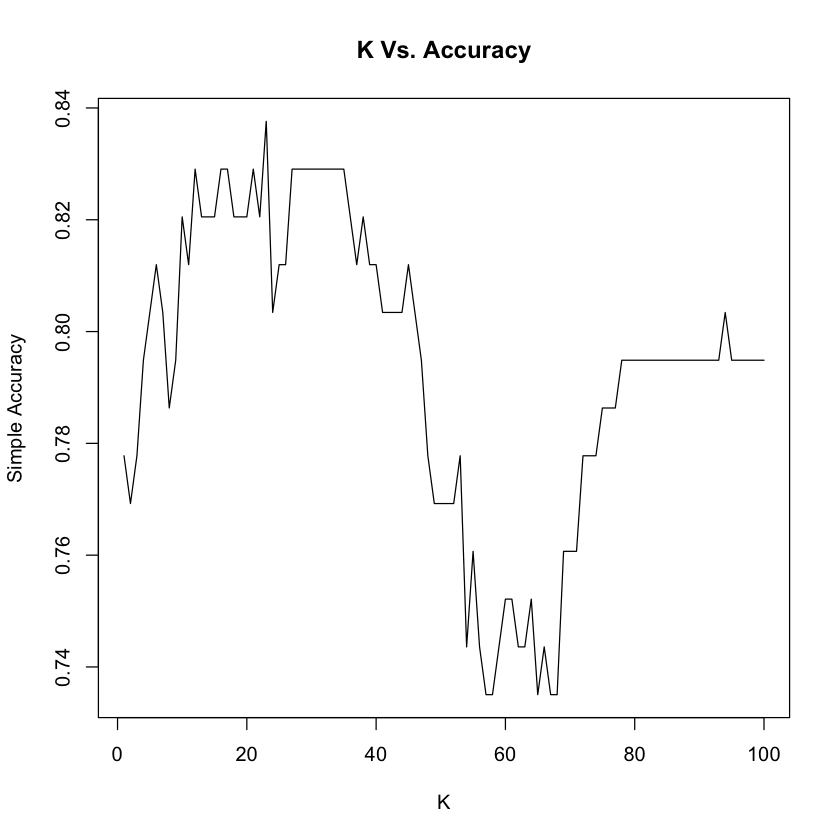

In [110]:
x = as.numeric(rownames(tabl))
y = tabl$Accuracy

plot(x, y, type="line", xlab="K", ylab="Simple Accuracy", main="K Vs. Accuracy")

Of these, we wee the maximum is at a K = 23, as shown below

In [111]:
tabl[tabl$Accuracy == max(tabl$Accuracy),]

,Accuracy,Precision,Recall,F
23,0.8376068,1,0.8041237,0.8914286
